In [1]:
from sklearn.decomposition import TruncatedSVD
import wikipedia
import nltk
nltk.download('wordnet')
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /home/swati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import re 
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stemmer = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/swati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/swati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def preprocess_text(document):
    document = re.sub(r'[^a-zA-Z0-9 ]','',str(document))
    document = re.sub(r'\n|\s{2,}', ' ',document)
    document = document.replace('\n', '').replace('\r', '')
    # document = re.sub(r'\s+[a-zA-Z]\s+','',document)
    # document = re.sub(r'\^[a-zA-Z]\s+','',document)
    # document = re.sub(r'\s+','',document, flags=re.I)
    # document = re.sub(r'^b\s+','',document)
    document = document.lower()
    # tokens = nltk.word_tokenize(document)

    tokens = document.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [word for word in tokens if len(word)>5]

    return tokens

In [3]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from gensim import corpora, models

/home/swati/.local/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [12]:
#read the links in textfile to a list
# opening the file in read mode
my_file = open("links.txt", "r")
  
# reading the file
link_file = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
link_list = link_file.split("\n")
print(link_list)
my_file.close()

['https://xploreall.com/devotional/18-shakti-peethas/', 'https://jawalaji.in/', 'https://behindeverytemple.org/hindu-temples/shakti/shankari-devi-temple/#:~:text=The%20Shankari%20Devi%20Temple%20is,to%20the%20Koneswaram%20Shiva%20Temple.', 'https://chamundeshwaritemple.in/ ', 'https://www.maakamakhya.org/ ', 'https://www.varanasi.org.in/vishalakshi-temple-varanasi', 'https://mathuravrindavantourism.co.in/prem-mandir-shyama-shyam-dham-vrindavan', 'https://www.bihariji.org/ ', 'https://shreejagannathmandir.org/', 'https://guruvayurdevaswom.in/#/login', 'https://karnatakatourism.org/tour-item/udupi-sri-krishna-temple/', 'https://mathuravrindavantourism.co.in/sri-krishna-janmasthan-mathura ', 'https://somnath.org/jay-somnath', 'https://www.srisailadevasthanam.org/en-in/about/the-temple-history/about-srisailam', 'https://shrimahakaleshwar.com/history', 'https://rameswaramramanathar.hrce.tn.gov.in/hrcehome/index_temple.php?tid=35671', 'https://www.ashtavinayak.in/pali-ballaleshwar-ganpati-as

In [16]:
def scrape_paragraphs(link_list ):
    content = []
    for link in link_list:
        response = requests.get(link)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find all <p> tags and extract their text
            paragraphs = soup.find_all('p')
            for paragraph in paragraphs:
                text = paragraph.get_text()
                tokens = preprocess_text(text)
                content.append(tokens)
    return content

In [13]:
def scrape_paragraph(link_list ):
    content = []
    for link in link_list:
        response = requests.get(link)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find all <p> tags and extract their text
            content.extend([p.get_text() for p in soup.find_all('p')])
    return content

In [14]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def find_common_words(link_list, k, out_file):
    paragraphs = scrape_paragraph(link_list)
    content = ' '.join(paragraphs)

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(content.lower())
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]

    word_counts = Counter(words)
    common_words = [word for word, count in word_counts.most_common(k)]

    with open(out_file,'w') as file:
        file.write('\n'.join(common_words))

# Example usage
k = 100
out_file = 'common_words.txt'
find_common_words(link_list, k, out_file)

In [29]:
#remove commonwords from the scrapped content
junk_word_file = open("common_words.txt", "r")
  
# reading the file
junk_word_file  = junk_word_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
junk_word_list = junk_word_file .split("\n")
#print(junk_word_list)
my_file.close()

def remove_words(paragraphs, words):
    # Split the paragraph into words and remove the specified words
    cleaned_paragraphs = []
    for paragraph in paragraphs:
        cleaned_words = [word for word in paragraph if word.lower() not in words]
        cleaned_paragraphs.append(cleaned_words)
    return cleaned_paragraphs

scraped_paragraphs = scrape_paragraphs(link_list)
cleaned_paragraphs = remove_words(scraped_paragraphs, junk_word_list)

In [30]:
print(cleaned_paragraphs)

[['consort', 'shrine', 'important', 'important', 'recognize', 'worship', 'ashtadasha', 'shakti', 'peethas', 'pakistanoccupied', 'kashmir', 'temple', 'destroyed', 'shakti', 'peethas', 'country'], [], ['sankaridevi', 'shakti', 'worshiped', 'ashtadasha', 'shakti', 'peethas', 'shankara', 'temple', 'shakti', 'peetha', 'located', 'hillock', 'trincomalee', 'presentday', 'thirukoneswaram', 'mother'], ['kamakshi', 'energy', 'creator', 'fulfill', 'desire', 'kanchi', 'kamakshi', 'temple', 'located', 'chennai', 'skeleton', 'mother'], ['velasindi', 'kshetra', 'located', 'village', 'pandava', 'hooghly', 'district', 'calcutta', 'presentday', 'bengal', 'temple', 'demolished', 'mohammedan', 'minaret', 'government', 'declared', 'shackle', 'believed', 'seller', 'shackle', 'problem', 'devotee', 'abdomen', 'mother', 'hansadevi', 'temple', 'ancient', 'temple', 'located', 'village', 'pandua', 'devotee', 'worship', 'hansadevi', 'goddess'], ['chamundeshwari', 'emerges', 'mahishasura', 'mardini', 'mysore', 'kar

In [31]:
#result = scrape_paragraphs(link_list)
input_dict = corpora.Dictionary(cleaned_paragraphs)
input_corpora = [input_dict.doc2bow(token, allow_update=True) for token in cleaned_paragraphs]

In [32]:
#lda model
lda_model = gensim.models.ldamodel.LdaModel(input_corpora,num_topics=10,id2word = input_dict,passes=20)
topics = lda_model.print_topics(num_words=10)
print(topics)

[(0, '0.034*"satcharita" + 0.014*"temple" + 0.010*"shimla" + 0.009*"shirdi" + 0.009*"darshan" + 0.007*"jakhoo" + 0.007*"december" + 0.006*"vishnu" + 0.005*"mandir" + 0.005*"devotee"'), (1, '0.083*"temple" + 0.012*"goddess" + 0.011*"devotee" + 0.005*"sanctum" + 0.004*"experience" + 0.004*"manali" + 0.004*"vishalakshi" + 0.004*"chamunda" + 0.003*"shrine" + 0.003*"located"'), (2, '0.016*"shirdi" + 0.015*"satcharita" + 0.007*"brahmin" + 0.006*"contact" + 0.005*"masjid" + 0.005*"onwards" + 0.004*"devotee" + 0.004*"august" + 0.004*"parvati" + 0.004*"detail"'), (3, '0.058*"temple" + 0.022*"devotee" + 0.013*"experience" + 0.012*"shirdi" + 0.010*"satcharita" + 0.006*"goddess" + 0.005*"worship" + 0.005*"constructed" + 0.005*"district" + 0.004*"ganesha"'), (4, '0.041*"temple" + 0.008*"festival" + 0.008*"shirdi" + 0.007*"devotee" + 0.007*"located" + 0.007*"ravana" + 0.006*"krishna" + 0.005*"satcharita" + 0.005*"shaktipeeth" + 0.005*"shakti"'), (5, '0.026*"ballal" + 0.026*"ganesha" + 0.009*"satchar

In [35]:
#Topic Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_paragraphs, dictionary=input_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5181222940896654


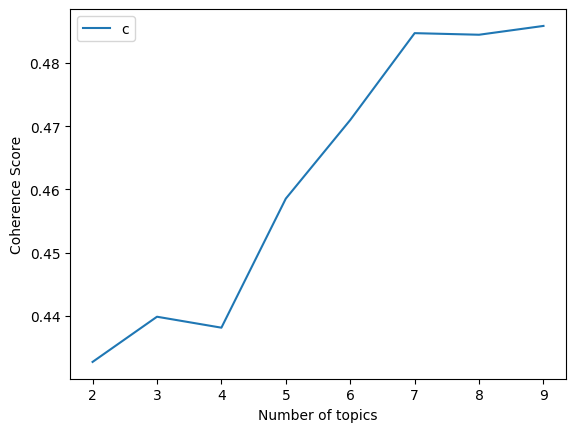

In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=input_corpora,num_topics=num_topics, random_state=100, chunksize=200, passes=20,per_word_topics=True,id2word=input_dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=cleaned_paragraphs, dictionary=input_dict,coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=input_dict, corpus = input_corpora, texts=cleaned_paragraphs, start=2, limit=10, step=1)
#plot line graph for viz
limit = 10;start=2;step=1;
x = range(start, limit,step)
plt.plot(x,coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [42]:
#final LDA model
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=input_corpora,id2word=input_dict,num_topics=9,random_state=100,chunksize=200,passes=20,per_word_topics=True)
coherence_model_lda=CoherenceModel(model=lda_model_final, texts=cleaned_paragraphs, dictionary=input_dict, coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.485862231448017


In [43]:
topic_word_distributions = lda_model_final.show_topics(formatted=False)

In [44]:
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.034*"satcharita" + 0.014*"temple" + 0.010*"shimla" + 0.009*"shirdi" + 0.009*"darshan" + 0.007*"jakhoo" + 0.007*"december" + 0.006*"vishnu" + 0.005*"mandir" + 0.005*"devotee"
Topic 1: 0.083*"temple" + 0.012*"goddess" + 0.011*"devotee" + 0.005*"sanctum" + 0.004*"experience" + 0.004*"manali" + 0.004*"vishalakshi" + 0.004*"chamunda" + 0.003*"shrine" + 0.003*"located"
Topic 2: 0.016*"shirdi" + 0.015*"satcharita" + 0.007*"brahmin" + 0.006*"contact" + 0.005*"masjid" + 0.005*"onwards" + 0.004*"devotee" + 0.004*"august" + 0.004*"parvati" + 0.004*"detail"
Topic 3: 0.058*"temple" + 0.022*"devotee" + 0.013*"experience" + 0.012*"shirdi" + 0.010*"satcharita" + 0.006*"goddess" + 0.005*"worship" + 0.005*"constructed" + 0.005*"district" + 0.004*"ganesha"
Topic 4: 0.041*"temple" + 0.008*"festival" + 0.008*"shirdi" + 0.007*"devotee" + 0.007*"located" + 0.007*"ravana" + 0.006*"krishna" + 0.005*"satcharita" + 0.005*"shaktipeeth" + 0.005*"shakti"
Topic 5: 0.026*"ballal" + 0.026*"ganesha" + 0.009*

In [45]:
import gensim.downloader as api
word_embedding_model = api.load("word2vec-google-news-300")
topic_word_embeddings = []
for topic_id, topic_words in topics:
    embeddings = []
    for word in topic_words.split(" "):
        if word in word_embedding_model.vocab:
            embeddings.append(word_embedding_model[word])
    topic_word_embeddings.append(embeddings)

KeyboardInterrupt: 

In [16]:
for i, embeddings in enumerate(topic_word_embeddings):
    print(f"Topic {i}:")
    for word, embedding in zip(topics[i][1].split(" "), embeddings):
        print(f"Word: {word}, Embedding: {embedding}")
    print()

Topic 0:
Word: 0.054*"Reference", Embedding: [ 0.0625     -0.19921875 -0.03833008  0.18554688  0.03759766  0.0625
 -0.41210938 -0.24316406  0.01647949  0.02294922 -0.24316406 -0.11621094
 -0.11328125 -0.15234375 -0.0480957   0.14355469  0.31445312  0.23144531
 -0.24902344 -0.04931641 -0.04443359  0.0050354   0.01867676  0.14648438
 -0.06542969 -0.02258301 -0.32421875  0.25195312  0.00671387 -0.13085938
 -0.00311279  0.09716797 -0.09960938 -0.1640625  -0.14746094 -0.02026367
 -0.15722656  0.18359375 -0.04638672  0.05297852 -0.0062561   0.07324219
 -0.0300293  -0.01574707 -0.02172852  0.0255127   0.05200195 -0.18554688
 -0.11083984 -0.07617188 -0.12158203  0.11669922 -0.03686523  0.23730469
  0.01611328  0.21484375 -0.01794434 -0.18554688 -0.03662109 -0.05981445
 -0.06494141  0.06689453 -0.24609375 -0.14257812  0.04272461 -0.26171875
 -0.04516602 -0.00897217  0.0050354   0.04956055 -0.03466797 -0.10009766
  0.08203125  0.06787109 -0.05151367 -0.04370117  0.1328125   0.12011719
 -0.134765

In [46]:
lda_model_final.save('/home/swati/Documents/Riya/Project/BS/GFGScrape/model')

In [133]:
from gensim.models import LdaModel
lda_model = LdaModel.load('/home/swati/Documents/Riya/Project/BS/GFGScrape/model')
text = wikipedia.page('Somanth temple').content
text = preprocess_text(text)
new_corpus = [input_dict.doc2bow(text)]
new_document_topics = lda_model.get_document_topics(new_corpus)
new_document_topics= lda_model.print_topics(num_words=5)
for topic_id, topic_words in new_document_topics:
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.066*"temple" + 0.045*"Temple" + 0.012*"pilgrimage" + 0.011*"devotee" + 0.009*"Krishna"
Topic 1: 0.042*"Reference" + 0.017*"Devotees" + 0.017*"Experiences" + 0.016*"passed" + 0.015*"Mandir"
Topic 2: 0.028*"temple" + 0.020*"Hanuman" + 0.017*"Temple" + 0.014*"Narasimha" + 0.011*"complex"
Topic 3: 0.015*"December" + 0.011*"village" + 0.011*"August" + 0.011*"devotee" + 0.010*"festival"
Topic 4: 0.049*"temple" + 0.012*"Maharaj" + 0.011*"century" + 0.006*"Temple" + 0.006*"people"
Topic 5: 0.015*"Ganesha" + 0.013*"Ballal" + 0.011*"always" + 0.008*"father" + 0.007*"ground"
Topic 6: 0.082*"Reference" + 0.068*"Satcharita" + 0.034*"Shirdi" + 0.029*"passed" + 0.015*"Samadhi"
Topic 7: 0.007*"November" + 0.007*"visited" + 0.007*"Temple" + 0.006*"Shimla" + 0.006*"Contact"


In [112]:
for doc_topics in new_document_topics:
    for topic_id, topic_prob in doc_topics:
        topic_words = lda_model.show_topic(topic_id, topn=5)
        print(f"Topic {topic_id}: {topic_words}")
    

Topic 0: [('temple', 0.06598745), ('Temple', 0.044561714), ('pilgrimage', 0.011552683), ('devotee', 0.011015747), ('Krishna', 0.009424456)]
Topic 1: [('Reference', 0.04195794), ('Devotees', 0.017398085), ('Experiences', 0.016838897), ('passed', 0.01604203), ('Mandir', 0.0147608025)]
Topic 2: [('temple', 0.027822468), ('Hanuman', 0.019970866), ('Temple', 0.017442657), ('Narasimha', 0.0137273455), ('complex', 0.011384411)]
Topic 3: [('December', 0.014529235), ('village', 0.011121909), ('August', 0.01094523), ('devotee', 0.010587475), ('festival', 0.010110802)]
Topic 4: [('temple', 0.048796356), ('Maharaj', 0.011791061), ('century', 0.010709898), ('Temple', 0.006321968), ('people', 0.0060165124)]
Topic 5: [('Ganesha', 0.0149578685), ('Ballal', 0.0131127825), ('always', 0.011486604), ('father', 0.0076407455), ('ground', 0.0070369407)]
Topic 6: [('Reference', 0.08229531), ('Satcharita', 0.06793383), ('Shirdi', 0.034494676), ('passed', 0.02868963), ('Samadhi', 0.015306377)]
Topic 7: [('Novem

[(0, [('satcharita', 0.02918281), ('mandir', 0.016553529), ('october', 0.015284302), ('december', 0.013628504), ('sansthan', 0.012194072), ('shirdi', 0.011742861), ('pradhan', 0.010162211), ('mumbai', 0.009302512), ('experience', 0.00882623), ('appointed', 0.007926297)]), (1, [('satcharita', 0.026404625), ('shirdi', 0.020781986), ('samadhi', 0.014953972), ('narasimha', 0.013256893), ('shrine', 0.011361563), ('darshan', 0.010922554), ('swamiji', 0.009436005), ('consort', 0.008549176), ('online', 0.008419629), ('khaparde', 0.007813178)]), (2, [('temple', 0.08943885), ('shimla', 0.0132684605), ('morning', 0.010788569), ('constructed', 0.010218834), ('festival', 0.008712656), ('devotee', 0.008472538), ('period', 0.008432987), ('important', 0.0080726305), ('sanctum', 0.0077529885), ('evening', 0.0075495252)]), (3, [('temple', 0.13985331), ('devotee', 0.022458099), ('experience', 0.014214357), ('located', 0.011305563), ('goddess', 0.0109274415), ('statue', 0.010349817), ('shrine', 0.00928825

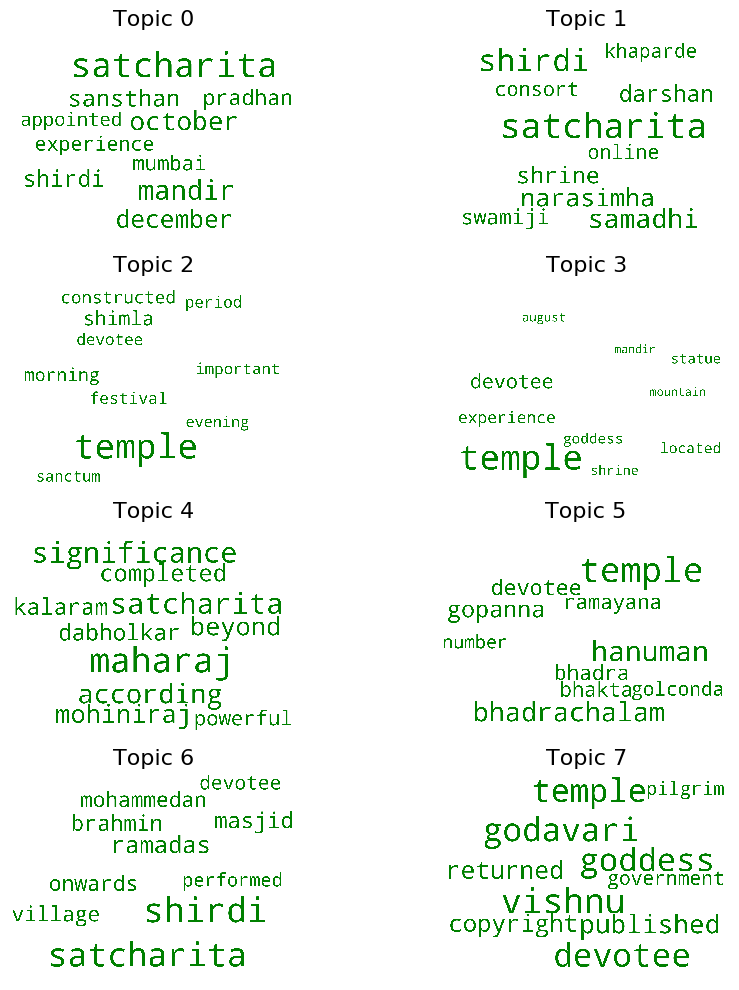

In [47]:
#wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: 'green',
                  prefer_horizontal=1.0)

topics = lda_model_final.show_topics(formatted=False)
print(topics)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [48]:
def topic_modeling_test(content):
    from gensim.models import LdaModel
    text = preprocess_text(content)
    dictionary = corpora.Dictionary([text])
    corpus = [dictionary.doc2bow(text)]
    num_topics = 8  # Example number of topics
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    lda_model.save('/home/swati/Documents/Riya/Project/BS/GFGScrape/model2')
    # Print the topics
    # for topic_id, topic in lda_model.show_topics(num_topics=num_topics):
    #     print(f"Topic {topic_id}: {topic}")
    return lda_model


In [142]:
def compare_topics(lda_model):
    from gensim.matutils import hellinger
    from gensim.models import LdaModel
    from sklearn.preprocessing import MinMaxScaler
    # Get the topics from each model
    seed_doc_model = LdaModel.load('/home/swati/Documents/Riya/Project/BS/GFGScrape/model')
    topics1 = seed_doc_model.show_topics(num_topics=-1)
    topics2 = lda_model.show_topics(num_topics=-1)
    # Compute topic similarity and overlap
    matching_topics = []
    overlapping_topics = []
    document_score = 0.0
    for topic1_id, topic1 in topics1:
        for topic2_id, topic2 in topics2:
            similarity = hellinger(lda_model_final.get_topic_terms(topic1_id), lda_model.get_topic_terms(topic2_id))
            if similarity > 0.4:  # Adjust the similarity threshold as needed
                matching_topics.append((topic1_id, topic2_id, similarity))
                # if topic1_id not in overlapping_topics:
                #     overlapping_topics.append(topic1_id)
                # if topic2_id not in overlapping_topics:
                #     overlapping_topics.append(topic2_id)

    # Print the matching and overlapping topics
    # print("Matching Topics:")
    for topic1_id, topic2_id, similarity in matching_topics:
        topic_weight = 1.0 / (topic1_id + 1)
        document_score += topic_weight * similarity
        # print(f"Model 1 - Topic #{topic1_id}: {topic1}")
        # print(f"Model 2 - Topic #{topic2_id}: {topic2}")
        # print(f"Similarity: {similarity}\n")
    # Normalize the document score between 0 and 1
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # document_score = scaler.fit_transform([[document_score]])[0][0]

    print(f"Final Document Score: {document_score}")
    return document_score
    # print("Overlapping Topics:")
    # for topic_id in overlapping_topics:
    #     print(f"Topic #{topic_id}: {topics1[topic_id][1]}")

    # topic_weights = []
    # document_score = 0.0
    # for topic1_id, similarity in matching_topics:
    #     topic_weight = 1.0 / (topic1_id + 1)  # Assign weight based on topic ID
    #     document_score += topic_weight * similarity

In [49]:
def compare_topics_cosine(lda_model):
    from gensim.models import LdaModel
    from gensim import corpora, models, similarities
    from sklearn.metrics.pairwise import cosine_similarity

    # Train the first topic model
    # Get the topics from each model
    seed_doc_model = LdaModel.load('/home/swati/Documents/Riya/Project/BS/GFGScrape/model')
    # Extract topic words from the first model
    topic_words1 = []
    for topic_id, topic in seed_doc_model.show_topics(num_topics=5, formatted=False):
        words = [word for word, _ in topic]
        topic_words1.append(words)

    # Extract topic words from the second model
    topic_words2 = []
    for topic_id, topic in lda_model.show_topics(num_topics=5, formatted=False):
        words = [word for word, _ in topic]
        topic_words2.append(words)

    # Combine all unique topic words from both models
    all_topic_words = set(sum(topic_words1, []) + sum(topic_words2, []))

    # Create vectors representing the presence of topic words in each model
    vector1 = [1 if word in topic_words1[i] else 0 for i in range(len(topic_words1)) for word in all_topic_words]
    vector2 = [1 if word in topic_words2[i] else 0 for i in range(len(topic_words2)) for word in all_topic_words]

    # Reshape the vectors for cosine similarity calculation
    vector1 = [vector1]
    vector2 = [vector2]

    # Calculate cosine similarity
    similarity = cosine_similarity(vector1, vector2)[0][0]
    print(f"Cosine similarity: {similarity}")

    return similarity

In [162]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
corpuss = api.load('text8')
# Load pre-trained Word2Vec model
from sklearn.metrics.pairwise import cosine_similarity
word2vec_model = Word2Vec(corpuss)
def compare_topics_cosines(lda_model):
    from gensim.models import LdaModel
    from gensim import corpora, models, similarities

    # Get the topics from each model
    seed_doc_model = LdaModel.load('/home/swati/Documents/Riya/Project/BS/GFGScrape/model')
    # Extract topic words from the first model
    topic_words1 = []
    for topic1_id, topic in seed_doc_model.show_topics(num_topics=5, formatted=False):
        words = [word for word, _ in topic]
        topic_words1.append(words)

    # Extract topic words from the second model
    topic_words2 = []
    for topic_id, topic in lda_model.show_topics(num_topics=5, formatted=False):
        words = [word for word, _ in topic]
        topic_words2.append(words)
# Calculate cosine similarity between corresponding topic words
    similarity_scores = []
    for i in range(9):
        topic_1_emb = [word2vec_model[word] for word in topic_words1[i] if word in word2vec_model]
        topic_2_emb = [word2vec_model[word] for word in topic_words2[i] if word in word2vec_model]
        similarity = cosine_similarity(topic_1_emb, topic_2_emb)
        similarity_scores.append(similarity)

    # Print cosine similarity scores
    for i, similarity in enumerate(similarity_scores):
        print(f"Topic {i+1}: {similarity}")
        topic_weight = 1.0 / (topic1_id + 1)
        document_score += topic_weight * similarity
        document_score += document_score
    print(f"Final Document Score: {document_score}")
    return document_score

[==================================================] 100.0% 31.6/31.6MB downloaded


In [21]:
# testing
text = wikipedia.page('Somanth temple').content
text = preprocess_text(text)
text = input_dict.doc2bow(text)
Final_topics = lda_model_final.get_document_topics(text)
print("Topics for the given document :" )
print(Final_topics)

Topics for the given document :
[(0, 0.22636232), (1, 0.06806661), (2, 0.07066347), (3, 0.38380802), (4, 0.06557436), (5, 0.068332635), (6, 0.080060296), (7, 0.037132256)]


In [50]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
from queue import Queue
from collections import namedtuple
import wikipedia
import random


In [51]:
#initiate a queue
crawled = Queue()
max_visits = 3
link_queue = Queue() 
start_url = "https://en.wikipedia.org/wiki/Jyotirlinga"
link_queue.put(start_url)

In [52]:
def is_valid_wikipedia_page(url):
    # Check if the URL matches the format of a valid Wikipedia page
    pattern = r"^https?://en\.wikipedia\.org/wiki/[^:]+$"
    return re.match(pattern, url) is not None

In [54]:
def crawl(link_queue, crawled_queue):
        while not link_queue.empty():
            url = link_queue.get()
            if url not in crawled_queue.queue and url not in link_queue.queue:
                
                response = requests.get(url)
                bs = BeautifulSoup(response.content, "html.parser")
                crawled_queue.put(url)
                if is_valid_wikipedia_page(url):
                    # Process the page here
                    print("Processing:", url)
                    ###
                    if not response.url.startswith("https://en.wikipedia.org/wiki/"):
                        print(f"Skipping non-Wikipedia page: {response.url}")
                        continue

                    for link in bs.find_all("a"):
                        href = link.get("href")
                        if href and href.startswith("/wiki/") and ":" not in href:
                            final_url=f"https://en.wikipedia.org{href}"

                            link_queue.put(final_url)
                    link_queue.task_done()

                    content = ""
                    for paragraph in bs.find_all("p"):
                        content += paragraph.text + "\n"

                    lda_model_2 = topic_modeling_test(content)
                    Document_score = compare_topics_cosine(lda_model_2)
                    if Document_score > 0.02:
                    # Save the content to a text file
                        filename = "files/files/"+response.url.split("/")[-1] + ".txt"
                        with open(filename, "w", encoding="utf-8") as file:
                            file.write(content)
                    else:
                        continue
                else:
                     continue
                
crawl(link_queue,crawled)
# while not crawled.empty():
#     print(crawled.get())

Processing: https://en.wikipedia.org/wiki/Main_Page
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Parameshwara_(god)
Cosine similarity: 0.02
Processing: https://en.wikipedia.org/wiki/Kashi_Vishwanath
Cosine similarity: 0.06
Processing: https://en.wikipedia.org/wiki/Romanization_of_Sanskrit
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Literal_translation
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Varaha
Cosine similarity: 0.06
Processing: https://en.wikipedia.org/wiki/Shloka
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Nageshwar_Jyotirling_Dwarka
Cosine similarity: 0.12
Processing: https://en.wikipedia.org/wiki/Ghushmeshwar_Temple
Cosine similarity: 0.1
Processing: https://en.wikipedia.org/wiki/Veraval
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Kurnool_District
Cosine similarity: 0.0
Processing: https://en.wikipedia.org/wiki/Shakti_Peetha
Cosine similarity: 0.06
Processing: https://en.

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))